# Image Processing Module 7: Labeling and Quantifying shape

In [24]:
#purpose: to move from thresholding and segmentation to shape feature quantification
import numpy as np
import pandas as pd
from scipy import ndimage

import skimage.filters
from skimage import morphology
from skimage.measure import label, regionprops, regionprops_table
from skimage.color import label2rgb
from skimage import io

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [25]:
#step 2: user input

In [26]:
cell_im_location = 'Downloads/textile/example_data/ogd_cells.tif'

In [27]:
cell_im = io.imread(cell_im_location)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


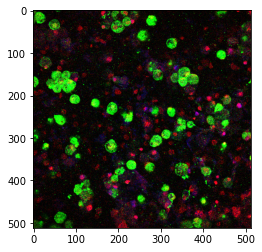

In [28]:
plt.imshow(cell_im)

In [29]:
#Step 5: splitting channels for thresholding

In [30]:
red_cell_im = cell_im[:,:,0]
green_cell_im = cell_im[:,:,1]
blue_cell_im = cell_im[:,:,2]

In [31]:
#apply the otsu threshold

In [32]:
thresh_otsu = skimage.filters.threshold_otsu(green_cell_im)
binary_otsu = green_cell_im > thresh_otsu
binary_otsu = morphology.remove_small_objects(binary_otsu, min_size=100)
binary_otsu = ndimage.binary_fill_holes(binary_otsu)

In [33]:
#step 7: checking our threshold

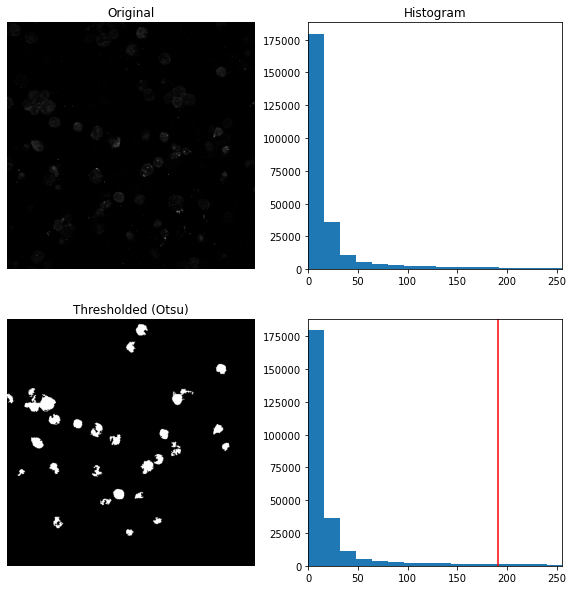

In [34]:
fig, ax = plt.subplots(2, 2, figsize=(10,10))

ax[0,0].imshow(green_cell_im, cmap=plt.cm.gray)
ax[0,0].set_title('Original')

ax[0,1].hist(green_cell_im.ravel(), bins=256)
ax[0,1].set_title('Histogram')
ax[0,1].set_xlim((0,255))

ax[1,0].imshow(binary_otsu, cmap=plt.cm.gray)
ax[1,0].set_title('Thresholded (Otsu)')

ax[1,1].hist(green_cell_im.ravel(), bins=256)
ax[1,1].axvline(thresh_otsu, color='r')
ax[1,1].set_xlim((0,255))

for a in ax[:,0]:
    a.axis('off')
plt.show()

In [35]:
#step 9: labeling the image

In [36]:
label_image = label(binary_otsu)
image_label_overlay = label2rgb(label_image, image=binary_otsu, bg_label=0)

In [37]:
#step 10: viewing the labeled image with area boxes

<function matplotlib.pyplot.show(close=None, block=None)>

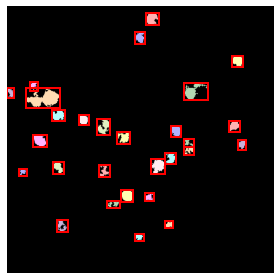

In [38]:
fig, ax = plt.subplots()
ax.imshow(image_label_overlay)

for region in regionprops(label_image):
    #take regions with large enough areas
    if region.area >= 100:
        #draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect=mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr, fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)
ax.set_axis_off() #taking this off includes the points on the x-axis and y-axis
plt.tight_layout()
plt.show

In [39]:
from skimage import measure

props = measure.regionprops_table(label_image, properties=('perimeter','area', 'major_axis_length', 'minor_axis_length'))

In [40]:
props

{'perimeter': array([ 92.32590181,  88.49747468,  73.59797975,  66.31980515,
        175.36753237,  65.28427125, 269.76450199,  98.56854249,
         67.18376618, 138.53910524,  71.14823228,  72.18376618,
        113.32590181,  86.63351365,  64.73401872,  55.45584412,
         92.35533906,  90.87615434, 115.46803743,  82.87615434,
        113.46194078,  52.49137803,  73.35533906,  60.28427125,
         95.59797975, 121.18986284,  63.73401872,  56.87005769]),
 'area': array([ 398,  273,  326,  141,  549,  149, 1256,  359,  278,  400,  273,
         298,  310,  418,  104,  172,  174,  269,  471,  259,  212,  102,
         389,  146,  164,  236,  148,  144]),
 'major_axis_length': array([24.7501597 , 22.77519568, 21.98640105, 18.3648856 , 44.01191495,
        21.3714953 , 65.49998832, 24.53660114, 19.45890119, 32.00792181,
        22.41441546, 21.79425086, 23.4366869 , 28.83915651, 20.39638895,
        17.04807491, 23.6455229 , 23.39976396, 28.47294619, 25.02527996,
        25.85010139, 1

In [41]:
green_shape_features = pd.DataFrame(props)

In [42]:
green_shape_features

,perimeter,area,major_axis_length,minor_axis_length
0,92.325902,398,24.750160,21.789002
1,88.497475,273,22.775196,17.030246
2,73.597980,326,21.986401,19.258513
3,66.319805,141,18.364886,11.386040
4,175.367532,549,44.011915,24.212775
5,65.284271,149,21.371495,10.038171
6,269.764502,1256,65.499988,30.102618
7,98.568542,359,24.536601,20.128970
8,67.183766,278,19.458901,18.351436
9,138.539105,400,32.007922,20.255763


In [43]:
#step 13: calculate the circularity

In [44]:
green_shape_features['circularity'] = 4*np.pi*green_shape_features.area/green_shape_features.perimeter**2

In [45]:
green_shape_features.head()

,perimeter,area,major_axis_length,minor_axis_length,circularity
0,92.325902,398,24.750160,21.789002,0.586740
1,88.497475,273,22.775196,17.030246,0.438037
2,73.597980,326,21.986401,19.258513,0.756303
3,66.319805,141,18.364886,11.386040,0.402849
4,175.367532,549,44.011915,24.212775,0.224328


In [47]:
green_shape_features['aspect_ratio'] = green_shape_features['major_axis_length']/green_shape_features['minor_axis_length']

In [48]:
green_shape_features

,perimeter,area,major_axis_length,minor_axis_length,circularity,aspect_ratio
0,92.325902,398,24.750160,21.789002,0.586740,1.135901
1,88.497475,273,22.775196,17.030246,0.438037,1.337338
2,73.597980,326,21.986401,19.258513,0.756303,1.141646
3,66.319805,141,18.364886,11.386040,0.402849,1.612930
4,175.367532,549,44.011915,24.212775,0.224328,1.817715
5,65.284271,149,21.371495,10.038171,0.439318,2.129023
6,269.764502,1256,65.499988,30.102618,0.216885,2.175890
7,98.568542,359,24.536601,20.128970,0.464331,1.218970
8,67.183766,278,19.458901,18.351436,0.773973,1.060348
9,138.539105,400,32.007922,20.255763,0.261894,1.580188


<AxesSubplot:xlabel='perimeter', ylabel='area'>

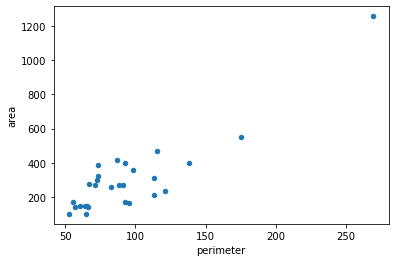

In [49]:
green_shape_features.plot(x='perimeter', y='area', kind='scatter')

<AxesSubplot:xlabel='circularity', ylabel='aspect_ratio'>

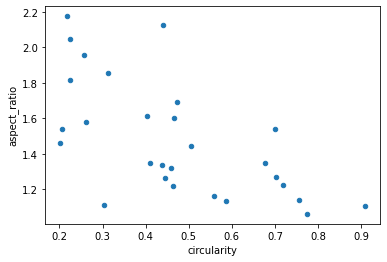

In [50]:
green_shape_features.plot(x='circularity', y='aspect_ratio', kind='scatter')

In [54]:
import seaborn as sb

<AxesSubplot:xlabel='circularity', ylabel='aspect_ratio'>

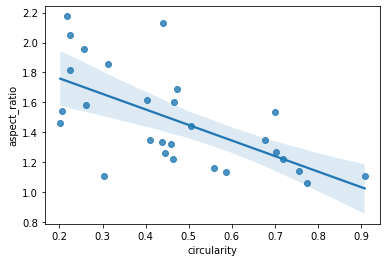

In [55]:
sb.regplot(x='circularity', y='aspect_ratio', data=green_shape_features)

In [11]:
'''from scipy import stats
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sb.jointplot(green_shape_features['circularity'], green_shape_features['aspect_ratio'], kind="reg", stat_func=r2)
'''


'from scipy import stats\ndef r2(x, y):\n    return stats.pearsonr(x, y)[0] ** 2\nsb.jointplot(green_shape_features[\'circularity\'], green_shape_features[\'aspect_ratio\'], kind="reg", stat_func=r2)\n'

In [12]:
#green_shape_features.to_csv('green_shape_features.csv')